## Identify Patterns and Trends of Breast Cancer Incidence Among Saudi Arabia Women


 

## Research Overview

> The primary goal of this Research is to perform Exploratory and Explanatory Data Analytics on Breast Cancer dataset in order to get insights on the relationship among breast cancer attributes.

## Dataset Overview
> The dataset used in this research was collected from Ministry of Health, King Fahd Medical City Hospital.
The dataset primarily include patients records such as age, cancer type, grade, BIRADS, breast density,  Breast Imaging Reporting and Data System (BIRADS) among others. The dataset contains 521 records and 16 columns.

## Data Wrangling
> This section entails, gathering, assessing, loading the dataset,  and data cleaning  to make it suitable for a better analysis. 

### Data Gathering
> This section focus on data gathering, in this regards through dirrect reading of the CSV file.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
# sb.set(style='darkgrid')

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# Read the MoH Breast Cancer Dataset into a DataFrame, aslo drop the first colum
breast_cancer_df = pd.read_csv('moh_breast_cancer_data.csv', index_col=0)
breast_cancer_df.reset_index(drop=True, inplace=True)

### Data Assessing
> In this section, the dataset would be assessed in order to identify quality and tidiness issues using both visual assessment and programmatic assessement methods.

In [3]:
# View the 5 records 
breast_cancer_df.head(20)

,AGE,BREAST DENSITY,BIRADS,US,CALCIFICATION,C.TYPE,STAGE,Stages (list),GRADE,MARKERS,Size US (List),SIZE SURGRY,LN,L.CTOMY,M.TOMY
0,47.0,C,0,V,P,IDC+DCIS,T1N0M0,1,II,ER+PR+H-,More Than 20 & Less OR Equal 50 MM,7MM,0l9,LP,MRM
1,50.0,B,V,V,P,IDC,T2N1M0,2B,III,ER-PR-H+,More Than 10 Less OR Equal 20 MM,15MM,0l1,LP,MRM
2,39.0,C,0,V,P,IDC+DCIS,T2N0M0,2A,II,ER+PR+H+,More Than 20 & Less OR Equal 50 MM,15MM,0l16,LP,MRM
3,56.0,B,V,V,N,IDC,T2N0M0,2A,II,ER+PR+H-,More Than 20 & Less OR Equal 50 MM,24MM,0l1,LP,MRM
4,52.0,C,V,V,P,IDC,T1N0M0,0,III,ER+PR-H+,More Than 10 Less OR Equal 20 MM,15MM,0l1,LP,MRM
5,58.0,NaN,0,V,N,NaN,T1N0M0,0,II,ER+PR+H-,More Than 20 & Less OR Equal 50 MM,15MM,0l1,LP,MRM
6,51.0,A,V,V,N,IDC,T2N1M0,2B,II,ER+PR+H-,More Than 10 Less OR Equal 20 MM,17MM,0l1,LP,MRM
7,42.0,B,0,V,N,IDC+DCIS,T1N0M0,1,II,ER+PR+H-,More Than 10 Less OR Equal 20 MM,15MM,0l1,LP,MRM
8,43.0,C,V,V,P,IDC+DCIS,T1N0M0,1,III,ER+PR+H-,More Than 10 Less OR Equal 20 MM,18MM,0l1,LP,MRM
9,61.0,A,V,V,N,IDC,T1N0M0,1,II,ER+PR+H-,More Than 5 LESS OR EQUAL 10 MM,15MM,0l1,LP,MRM


In [4]:
# Cheking number rows and columns 
breast_cancer_df.shape

(521, 15)

After droppig the index column, there are `521` rows and `15` columns in the datatset.

In [5]:
breast_cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 521 entries, 0 to 520
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   AGE             520 non-null    float64
 1   BREAST DENSITY  495 non-null    object 
 2   BIRADS          521 non-null    object 
 3   US              521 non-null    object 
 4   CALCIFICATION   491 non-null    object 
 5   C.TYPE          493 non-null    object 
 6   STAGE           521 non-null    object 
 7   Stages (list)   521 non-null    object 
 8   GRADE           521 non-null    object 
 9   MARKERS         521 non-null    object 
 10  Size US (List)  521 non-null    object 
 11  SIZE SURGRY     521 non-null    object 
 12  LN              521 non-null    object 
 13  L.CTOMY         521 non-null    object 
 14  M.TOMY          521 non-null    object 
dtypes: float64(1), object(14)
memory usage: 61.2+ KB


It can be observed from above that the column labels are not descriptive and no uniform naming convention, hence, they will be renamed with more descriptive names, underscore (`_`) will be used replace white spaces `" "` and `.` between two or more words using the `.replace()` function. The column labels will also be converted to lower case using the `.lower()` function, as this will ease better analysis and the use of dot (`.`) notation.
Also, the `AGE` datatype is shown as `float` instead of `in`, this will be rectified using `casting`.

In [6]:
# Check the statiscal distribution of the data
breast_cancer_df.describe()

,AGE
count,520.000000
mean,53.453846
std,8.839273
min,31.000000
25%,47.000000
50%,53.000000
75%,59.000000
max,84.000000


It can be observed from the above statistical distribution that the maximum age of the patients is `80 years old`, the minimum age is `31 years old`, while the average age of the `53 years old`. Further analyisis will reveal the relationship between the patient’s age, cancer grade and type.

In [7]:
# Cehck for duplicate records
print('Number of duplicate found is',sum(breast_cancer_df.duplicated()))

Number of duplicate found is 1


In [8]:
# Check for total number of NULL value 
print('Number of NULL values is ',sum(breast_cancer_df.isnull().sum()))

Number of NULL values is  85


In [9]:
# Checking for NULL values across the columns
null_counts = breast_cancer_df.isnull().sum()
print(null_counts)

AGE                1
BREAST DENSITY    26
BIRADS             0
US                 0
CALCIFICATION     30
C.TYPE            28
STAGE              0
Stages (list)      0
GRADE              0
MARKERS            0
Size US (List)     0
SIZE SURGRY        0
LN                 0
L.CTOMY            0
M.TOMY             0
dtype: int64


It can be noticed that, `CALCIFICATION` has the highest number of NULL values with `30`, followed by `C.TYPE` with `28` and  `BREAST DENSITY` with `26`, while `age` have only `1` NULL value. All these will be treated during data cleaning.

In [10]:
for i, v in enumerate(breast_cancer_df):
    print(i, v)

0 AGE
1 BREAST DENSITY
2 BIRADS
3 US
4 CALCIFICATION
5 C.TYPE
6 STAGE
7 Stages (list)
8 GRADE
9 MARKERS
10 Size US (List)
11 SIZE SURGRY
12 LN
13 L.CTOMY
14 M.TOMY


In [11]:
# Check unique values
breast_cancer_df.CALCIFICATION.value_counts()

P    246
N    244
p      1
Name: CALCIFICATION, dtype: int64

The classification column have 3 classes `P`, `N` and `p` instead of 2 `P`, `N`. This will be corrected. However, `P` will be replaced with `1`, while `N` will be replaced with `0`. for easy analysis.

## Data Cleaning
> This secion will focus on performing a comprehensive data cleaning by dropping columns that are not needed, perfect the column labels, fill or drop NaN among others.

In [12]:
# Normalise the column labels
breast_cancer_df.columns = breast_cancer_df.columns.str.replace(" ", "_").str.replace("p","P").str.replace(".", "_").str.lower()


In [13]:
breast_cancer_df.calcification.value_counts()

P    246
N    244
p      1
Name: calcification, dtype: int64

In [14]:
# Replace all accorence of p with P
breast_cancer_df['calcification'] = breast_cancer_df['calcification'].replace('p', 'P')

In [15]:
# Confirm Replacement 
breast_cancer_df.calcification.value_counts()

P    247
N    244
Name: calcification, dtype: int64

In [16]:
breast_cancer_df.grade.unique()

array(['II', 'III', 'I', 'I-II', 'IIII', '2l3', '1l3'], dtype=object)

In [17]:
# Correct invalid cancer grade
breast_cancer_df['grade'] = breast_cancer_df['grade'].replace('I-II', 'III').replace('2l3', 'III').replace('1l3', 'III').replace('IIII', 'III')


In [18]:
# confirm that the column labels has been fixed
breast_cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 521 entries, 0 to 520
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             520 non-null    float64
 1   breast_density  495 non-null    object 
 2   birads          521 non-null    object 
 3   us              521 non-null    object 
 4   calcification   491 non-null    object 
 5   c_type          493 non-null    object 
 6   stage           521 non-null    object 
 7   stages_(list)   521 non-null    object 
 8   grade           521 non-null    object 
 9   markers         521 non-null    object 
 10  size_us_(list)  521 non-null    object 
 11  size_surgry     521 non-null    object 
 12  ln              521 non-null    object 
 13  l_ctomy         521 non-null    object 
 14  m_tomy          521 non-null    object 
dtypes: float64(1), object(14)
memory usage: 61.2+ KB


In [19]:
"""
Columns that are not needed will be dropped, 
as some columns deal with surgry or perhaps really not relevant to the analysis.
Columns to be dropped are: markers, size_us_(list), size_surgry, ln, l_ctomy, m_tomy
""" 

                       
# breast_cancer_df.drop(['markers', 'stages_(list)'], axis=1, inplace=True)
                       

'\nColumns that are not needed will be dropped, \nas some columns deal with surgry or perhaps really not relevant to the analysis.\nColumns to be dropped are: markers, size_us_(list), size_surgry, ln, l_ctomy, m_tomy\n'

In [20]:
sum(breast_cancer_df.isnull().sum())

85

In [21]:
# Rename c_type with type
breast_cancer_df.rename(columns = {'c_type':'type', 'm_tomy':'mastectomy','l_ctomy':'lumpectomy','size_us_(list)':'ultrasound_size', 'size_surgry':'surgry_size', 'ln':'lymph_node', 'us':'ultrasound' }, inplace = True)

In [22]:
# Chack for NULL values 
breast_cancer_df.isnull().sum()

age                 1
breast_density     26
birads              0
ultrasound          0
calcification      30
type               28
stage               0
stages_(list)       0
grade               0
markers             0
ultrasound_size     0
surgry_size         0
lymph_node          0
lumpectomy          0
mastectomy          0
dtype: int64

In [23]:
# Drop all NULL values 
breast_cancer_df.dropna(subset = ['age', 'breast_density', 'calcification', 'type'], inplace=True)

In [24]:
# Confirm all NULL values has been dropped
breast_cancer_df.isnull().sum()

age                0
breast_density     0
birads             0
ultrasound         0
calcification      0
type               0
stage              0
stages_(list)      0
grade              0
markers            0
ultrasound_size    0
surgry_size        0
lymph_node         0
lumpectomy         0
mastectomy         0
dtype: int64

In [25]:
# Convert age datatype from float to int
breast_cancer_df['age'] = breast_cancer_df['age'].astype(int)

In [26]:
breast_cancer_df.grade.value_counts()

II     281
III    136
I       37
Name: grade, dtype: int64

In [27]:
# Make a copy of the cleaned data
breast_cancer_df_clean = breast_cancer_df.copy()

In [28]:
# Randomly preveiew the data
breast_cancer_df_clean.sample(10)

,age,breast_density,birads,ultrasound,calcification,type,stage,stages_(list),grade,markers,ultrasound_size,surgry_size,lymph_node,lumpectomy,mastectomy
120,60,A,0,IV,P,IDC+DCIS,T1N0M0,1,III,ER-PR-H+,More Than 10 Less OR Equal 20 MM,17MM,0l1,LP,MRM
267,41,B,V,V,P,IDC,T3N1M0,3A,III,ER+PR-H-,More Than 20 & Less OR Equal 50 MM,15MM,0l1,LP,MRM
193,42,D,V,V,P,IDC+DCIS,T3N0M0,2B,II,ER+PR+H-,More Than 20 & Less OR Equal 50 MM,23MM,1l17,LP,MRM
78,63,A,0,V,P,DCIS,TisN0M0,0,II,ER+PR+H-,More Than 20 & Less OR Equal 50 MM,15MM,0l1,LP,MRM
516,44,A,0,IV,P,DCIS,T1N0M0,0,II,ER+PR+,More Than 5 LESS OR EQUAL 10 MM,15MM,0l1,LP,MRM
179,54,C,V,V,N,IDC+DCIS,T2N1M0,2B,II,ER+PR+H-,More Than 20 & Less OR Equal 50 MM,35MM,3l13,LP,MRM
434,53,B,0,IV,P,DCIS,T1N0M0,0,II,ER+PR+H-,More Than 20 & Less OR Equal 50 MM,15MM,0l1,LP,MRM
112,73,A,V,V,P,IDC+DCIS,T1N1M0,2A,II,ER+PR+H-,More Than 20 & Less OR Equal 50 MM,20MM,3l18,LP,MRM
359,48,B,0,V,N,IDC,T1N1M0,2A,II,ER+PR+H-,More Than 10 Less OR Equal 20 MM,15MM,3l8,LP,MRM
140,53,C,0,IV,N,IDC,T1N0M0,0,III,ER-PR+H+,More Than 10 Less OR Equal 20 MM,15MM,0l1,LP,MRM


In [29]:
breast_cancer_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 454 entries, 0 to 520
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              454 non-null    int64 
 1   breast_density   454 non-null    object
 2   birads           454 non-null    object
 3   ultrasound       454 non-null    object
 4   calcification    454 non-null    object
 5   type             454 non-null    object
 6   stage            454 non-null    object
 7   stages_(list)    454 non-null    object
 8   grade            454 non-null    object
 9   markers          454 non-null    object
 10  ultrasound_size  454 non-null    object
 11  surgry_size      454 non-null    object
 12  lymph_node       454 non-null    object
 13  lumpectomy       454 non-null    object
 14  mastectomy       454 non-null    object
dtypes: int64(1), object(14)
memory usage: 56.8+ KB


## Data Visualisation 

In [30]:
# Function for variables distribution
def distribution_plot(dataframe, column_name,bins_base):
    column_name_counts = dataframe[column_name].value_counts()
    plot=plt.hist(data=dataframe,x=column_name,bins=bins_base)
    return(plot)

# Function to plot virtical bar
def count_plot(dataframe,column_name, xlabel="", ylabel=""):
    base_color=sb.color_palette()[0]
    column_name_count=dataframe[column_name].value_counts()
    plot=sb.countplot(data=dataframe,x=column_name,color=base_color,order=column_name_count.index);
    return(plot)

# Function to plot horizontal bar
def count_plot_horizontal(dataframe,column_name, xlabel="", ylabel=""):
    base_color=sb.color_palette()[0]
    column_name_count=dataframe[column_name].value_counts()
    plot=sb.countplot(data=dataframe,y=column_name,color=base_color,order=column_name_count.index);
    return(plot)


**Age Distribution of The Patients**

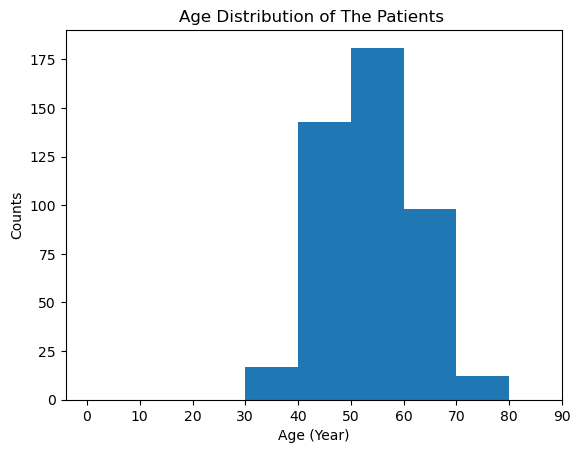

In [31]:
#  age distribution 
bins_base = np.arange(0, breast_cancer_df_clean['age'].max(), 10)
distribution_plot(breast_cancer_df_clean,'age', bins_base)

plt.title("Age Distribution of The Patients ")
plt.xlabel("Age (Year)")
plt.ylabel("Counts")
plt.xticks(np.arange(0, breast_cancer_df_clean['age'].max()+10, 10));

The age dsitribution of the patients appears to be almost a normal distribution, with majorrity of the patients beign `50 years old`. This also revealed that, breast cancer rarely affect patient less than 30 years old. 

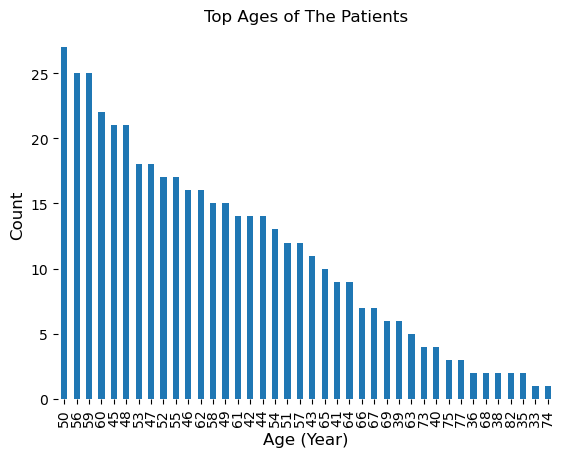

In [32]:
# Function to plot horizontal bar for the top age distribution. 
def plot_bar_cahrt():
    base_color=sb.color_palette()[0]
    base_order = breast_cancer_df_clean.value_counts().index
    breast_cancer_df_clean.age.value_counts().head(40).plot(kind='bar');
    plt.title("Top Ages of The Patients", fontsize=12)
    plt.ylabel("Count", fontsize=12)
    plt.xlabel("Age (Year)", fontsize=12)
    for spine in plt.gca().spines.values():
        spine.set_visible(False)

plot_bar_cahrt()     

In conformity with age distribution, the above bar shows that the majority of the patients still remains between the age of 50 and 60 years old.

**Distribution of Cancer Stage**

In [33]:
# Percentage distribution of cancer stage
(breast_cancer_df_clean.stage.value_counts().head(10)/breast_cancer_df_clean.shape[0] * 100).round(2)

T1N0M0    36.56
T2N0M0    13.66
T2N1M0    11.45
T3N1M0     9.47
T3N0M0     7.27
T1N1M0     3.96
T4N1M0     2.86
T0N0M0     1.98
T2N2M0     1.76
T2N1M1     1.32
Name: stage, dtype: float64

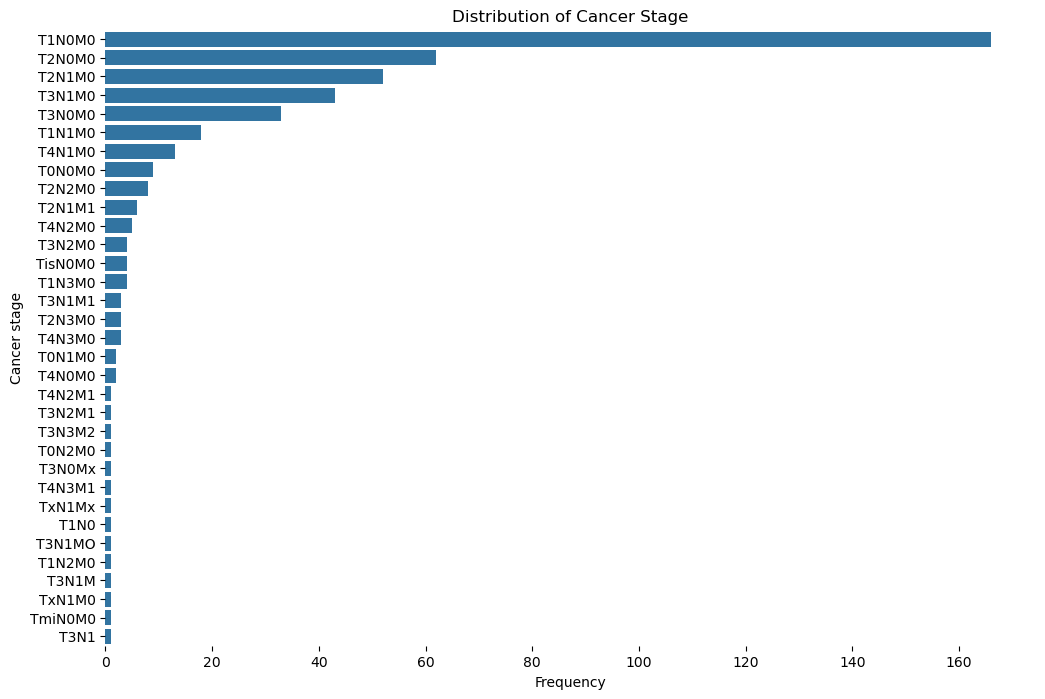

In [34]:
plt.figure(figsize=(12,8)) 
#  Call the `count_plot_horizontal` function
count_plot_horizontal(breast_cancer_df_clean, 'stage')
plt.title ("Distribution of Cancer Stage")
plt.ylabel("Cancer stage")
plt.xlabel("Frequency")

for spine in plt.gca().spines.values():
    spine.set_visible(False)


It can be observed that `T1N0M0` is the major cancer stage exhibit by the patients with `36.56%`, followed by `T2N0M0`  and `T2N1M0` with `13.66%` and `11.45%` respectively.

**Distribution of Cancer Grade**

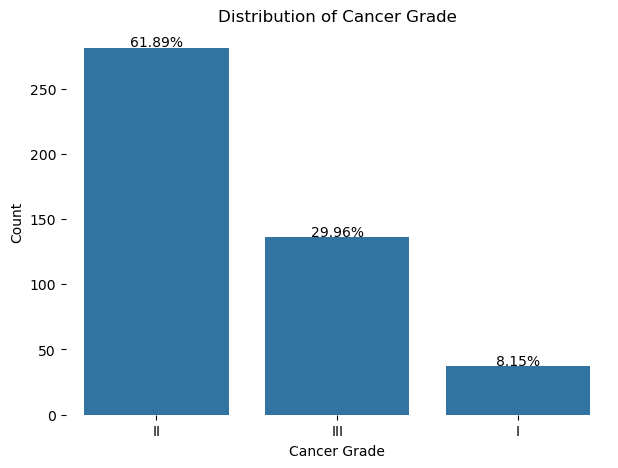

In [35]:
base_color = sb.color_palette()[0]
plt.figure(figsize=(7,5)) 
ax = sb.countplot(data=breast_cancer_df_clean, x='grade', color=base_color);

pct = []
for i in ax.patches:
    pct.append(i.get_height())
    
percentage_sum = sum(pct)
for i in ax.patches:
    val = i.get_height()
    
# Calculate the percentage for each bar
    percentage = (val/percentage_sum) * 100
    ax.text(i.get_x() + i.get_width()/2., val + 1, f'{percentage:.2f}%', ha='center')
    
for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.title("Distribution of Cancer Grade")
plt.xlabel('Cancer Grade')
plt.ylabel('Count')

plt.show()         

Cancer grade `II` appears to be the major breast cancer grade with `61.89%`, follwoed by cancer grade `III` with `29.96%`, and cancer grade `I` with `8.15%`.

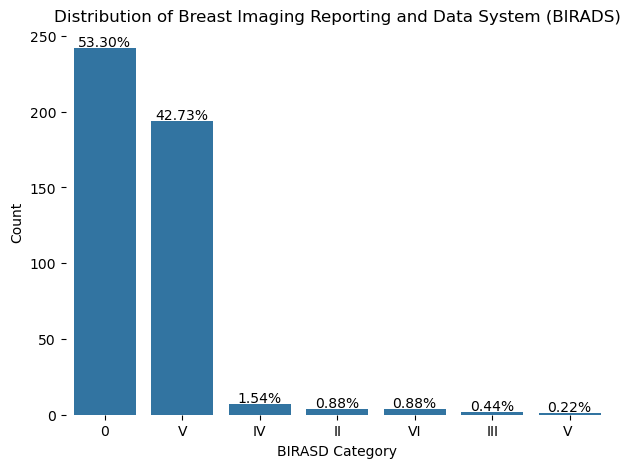

In [36]:
base_color = sb.color_palette()[0]
base_order = breast_cancer_df_clean.birads.value_counts().index
plt.figure(figsize=(7,5)) 
ax = sb.countplot(data=breast_cancer_df_clean, x='birads', color=base_color,order=base_order);

pct = []
for i in ax.patches:
    pct.append(i.get_height())
    
percentage_sum = sum(pct)
for i in ax.patches:
    val = i.get_height()
    
# Calculate the percentage for each bar
    percentage = (val/percentage_sum) * 100
    ax.text(i.get_x() + i.get_width()/2., val + 1, f'{percentage:.2f}%', ha='center')
    
for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.title("Distribution of Breast Imaging Reporting and Data System (BIRADS)")
plt.xlabel('BIRASD Category')
plt.ylabel('Count')

plt.show()  

The above chart depicts that `53.30%` of the patients  falls in BIRAD category `0`, this impleis imcomplete test, that is, additional imaging evaluation and/or comparison to prior mammograms (or other imaging tests) is needed. Wheile, `42.73%` of the patients falls in BIRAD category `V`. 


**Distribution of cancer type**

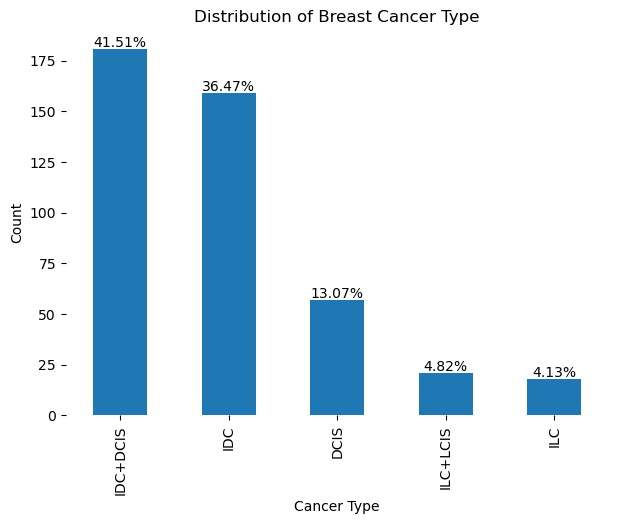

In [37]:
base_color = sb.color_palette()[0]
plt.figure(figsize=(7,5)) 
ax =  breast_cancer_df_clean.type.value_counts().head(5).plot(kind='bar');
# ax = sb.countplot(data=breast_cancer_df_clean, x='type', color=base_color);

pct = []
for i in ax.patches:
    pct.append(i.get_height())
    
percentage_sum = sum(pct)
for i in ax.patches:
    val = i.get_height()
    
# Calculate the percentage for each bar
    percentage = (val/percentage_sum) * 100
    ax.text(i.get_x() + i.get_width()/2., val + 1, f'{percentage:.2f}%', ha='center', fontsize=10)
    
for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.title("Distribution of Breast Cancer Type")
plt.xlabel('Cancer Type')
plt.ylabel('Count')

plt.show()  

**Correlation among all the variables**
> Because majority of the variables are categorical data, there would be need to convert them to numerical data.

In [38]:
# Convert features to categorical datatype
breast_cancer_df_clean['type']=breast_cancer_df_clean['type'].astype('category').cat.codes
breast_cancer_df_clean['stage']=breast_cancer_df_clean['stage'].astype('category').cat.codes
breast_cancer_df_clean['breast_density']=breast_cancer_df_clean['breast_density'].astype('category').cat.codes
breast_cancer_df_clean['birads']=breast_cancer_df_clean['birads'].astype('category').cat.codes
breast_cancer_df_clean['grade']=breast_cancer_df_clean['grade'].astype('category').cat.codes
breast_cancer_df_clean['calcification']=breast_cancer_df_clean['calcification'].astype('category').cat.codes
breast_cancer_df_clean['ultrasound']=breast_cancer_df_clean['ultrasound'].astype('category').cat.codes


In [39]:
# Correlation among the varibles.
(breast_cancer_df_clean.corr())

,age,breast_density,birads,ultrasound,calcification,type,stage,grade
age,1.000000,-0.211828,0.031027,0.011674,-0.092027,0.075283,-0.035943,-0.175667
breast_density,-0.211828,1.000000,0.046817,0.044177,0.015915,0.052856,0.113375,0.013815
birads,0.031027,0.046817,1.000000,0.246886,0.110918,0.037890,0.171003,0.074637
ultrasound,0.011674,0.044177,0.246886,1.000000,0.013190,0.112405,0.118579,0.020352
calcification,-0.092027,0.015915,0.110918,0.013190,1.000000,-0.205844,-0.029551,-0.058195
type,0.075283,0.052856,0.037890,0.112405,-0.205844,1.000000,0.169909,-0.036214
stage,-0.035943,0.113375,0.171003,0.118579,-0.029551,0.169909,1.000000,0.191466
grade,-0.175667,0.013815,0.074637,0.020352,-0.058195,-0.036214,0.191466,1.000000


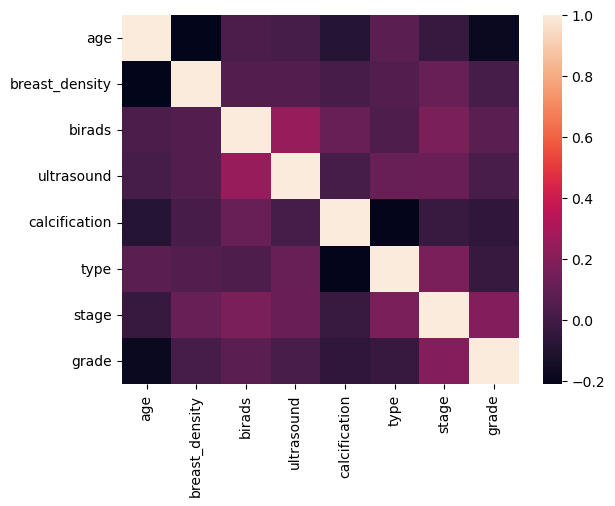

In [40]:
# Visualize the correlation among the varibles.
sb.heatmap(breast_cancer_df_clean.corr());

Positive correlations can be observed between `grade` and `stage`, `birads` and `stage`, while nagative correlations can be observed between `age` and `grade`, `calcification` and `type` among others.

## KEY INSIGHTS
After an In-depth analysis, the following insights were revealed by the data.
> - Breast cancer rarely affect women below the age of 30.
> - The most vulnerable age group of breast cancer is between 50 - 60 years old.
> - Majority of the patients belong to the early-stage primary pulmonary adenocarcinoma (T1N0M0) cancer stage, which signifies the chances of the patients having an early breast cancer test.
> - 61.89% of the patients fall under cancer grade II, while only 29.96% of them fall under cancer grade III, the 32% reduction of patients from cancer grade II to cancer grade III signifies a posible positive response to breast cancer treatments.
> - There is a positive correlations between cancer grade and stage, birads and stage, while a  negative correlations were also observed between age and cancer stage, grade and breast density. 